<a href="https://colab.research.google.com/github/Gadha10/Lung_Cancer/blob/main/Lung_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***About Dataset:***The effectiveness of cancer prediction system helps the people to know their cancer risk with low cost and it also helps the people to take the appropriate decision based on their cancer risk status.



*  Gender: M(male), F(female)

*   Age: Age of the patient
*   Smoking: YES=2 , NO=1


*   Yellow fingers: YES=2 , NO=1

*   Anxiety: YES=2 , NO=1
*   Peer_pressure: YES=2 , NO=1


*  Chronic Disease: YES=2 , NO=1

*   Fatigue: YES=2 , NO=1
*   Allergy: YES=2 , NO=1

*   Wheezing: YES=2 , NO=1
*   Alcohol: YES=2 , NO=1

*   Coughing: YES=2 , NO=1
*   Shortness of Breath: YES=2 , NO=1

*   Swallowing Difficulty: YES=2 , NO=1

*   Chest pain: YES=2 , NO=1
*   Lung Cancer: YES , NO

In [25]:
#importing required libraries
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report
import warnings
warnings.filterwarnings('ignore')

In [26]:
#Loading the dataset
df=pd.read_csv('/content/drive/MyDrive/DataSet/survey lung cancer.csv')

In [27]:
#to get first 5 rows
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [28]:
#to get last 5 rows
df.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


In [29]:
#column names
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [30]:
#Finding missing values
df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [31]:
#Finding duplicate values
df.duplicated().sum()

33

In [32]:
#Deleting duplicate rows
df.drop_duplicates(inplace=True)

In [33]:
df.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

In [34]:
#Converting all string values to numeric
le=LabelEncoder()
lst=['GENDER','LUNG_CANCER']
for i in lst:
  df[i]=le.fit_transform(df[i])

In [35]:
df.dtypes

GENDER                   int64
AGE                      int64
SMOKING                  int64
YELLOW_FINGERS           int64
ANXIETY                  int64
PEER_PRESSURE            int64
CHRONIC DISEASE          int64
FATIGUE                  int64
ALLERGY                  int64
WHEEZING                 int64
ALCOHOL CONSUMING        int64
COUGHING                 int64
SHORTNESS OF BREATH      int64
SWALLOWING DIFFICULTY    int64
CHEST PAIN               int64
LUNG_CANCER              int64
dtype: object

In [36]:
#separating the dataset into input(X) and output(y)variables
X=df.drop('LUNG_CANCER', axis=1)
y=df['LUNG_CANCER']

In [37]:
#Scaling the Age column
sc=StandardScaler()
X['AGE']=sc.fit_transform(X[['AGE']])
X.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,0.728176,1,2,2,1,1,2,1,2,2,2,2,2,2
1,1,1.325964,2,1,1,1,2,2,2,1,1,1,2,2,2
2,0,-0.467401,1,1,1,2,1,2,1,2,1,2,2,1,2
3,1,0.010830,2,2,2,1,1,1,1,1,2,1,1,2,2
4,0,0.010830,1,2,1,1,1,1,1,2,1,2,2,1,1


In [38]:
#Splitting dataset into training and test set 
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.3)

**Naive Bayes V/S K-Nearest Neighbor V/S Support Vector Machine**

****************************************************************************************************
GaussianNB()
Accuracy Score by GaussianNB() : 0.8433734939759037
              precision    recall  f1-score   support

           0       0.45      0.42      0.43        12
           1       0.90      0.92      0.91        71

    accuracy                           0.84        83
   macro avg       0.68      0.67      0.67        83
weighted avg       0.84      0.84      0.84        83

****************************************************************************************************
****************************************************************************************************
KNeighborsClassifier()
Accuracy Score by KNeighborsClassifier() : 0.8795180722891566
              precision    recall  f1-score   support

           0       0.62      0.42      0.50        12
           1       0.91      0.96      0.93        71

    accuracy                           0.88        83
  

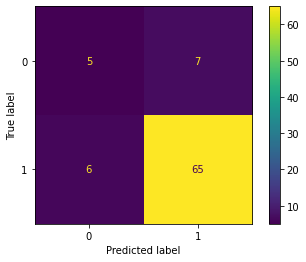

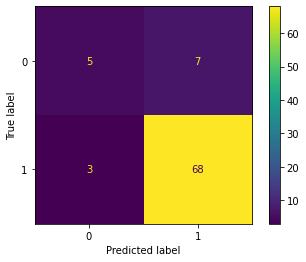

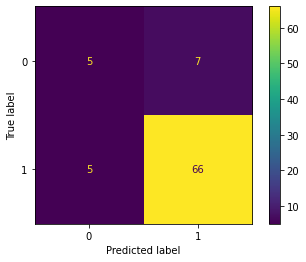

In [39]:
#Model creation
nb=GaussianNB()
knn=KNeighborsClassifier(n_neighbors=5)
sv=SVC()
lst1=[nb,knn,sv]
for model in lst1:
  print('*'*100)
  print(model)
  #Model fitting
  model.fit(X_train,y_train)
  #Make Prediction on test set
  y_pred=model.predict(X_test)
  #performance evaluation
  print('Accuracy Score by',model,':',accuracy_score(y_test,y_pred))
  print(classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
  print('*'*100)

**Imbalance data**

<AxesSubplot:xlabel='LUNG_CANCER', ylabel='count'>

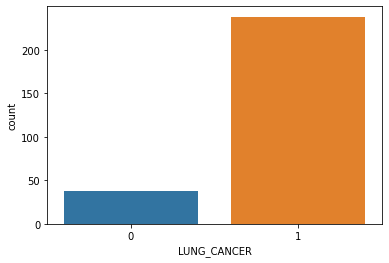

In [40]:
sns.countplot(df['LUNG_CANCER'])

**OVERSAMPLING**

In [41]:
oversample=SMOTE(random_state=2)
X_os,y_os=oversample.fit_resample(X,y)

<AxesSubplot:xlabel='LUNG_CANCER', ylabel='count'>

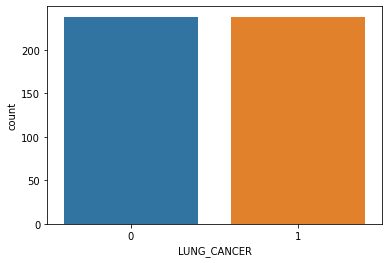

In [42]:
sns.countplot(y_os)

In [43]:
#Splitting dataset into training and test set 
X_trainos,X_testos,y_trainos,y_testos=train_test_split(X_os,y_os,test_size=0.3,random_state=1)

**Naive Bayes V/S K-Nearest Neighbor V/S Support Vector Machine**

GaussianNB()
Accuracy Score by GaussianNB() : 0.9230769230769231
              precision    recall  f1-score   support

           0       0.93      0.92      0.92        71
           1       0.92      0.93      0.92        72

    accuracy                           0.92       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143

****************************************************************************************************
KNeighborsClassifier()
Accuracy Score by KNeighborsClassifier() : 0.9090909090909091
              precision    recall  f1-score   support

           0       0.87      0.96      0.91        71
           1       0.95      0.86      0.91        72

    accuracy                           0.91       143
   macro avg       0.91      0.91      0.91       143
weighted avg       0.91      0.91      0.91       143

***********************************************************************************************

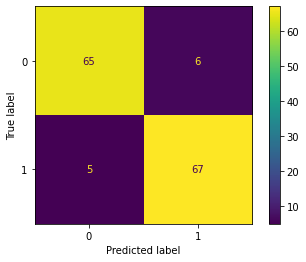

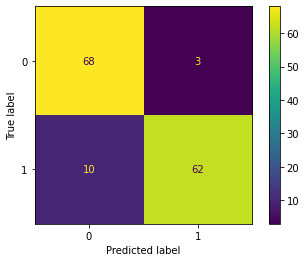

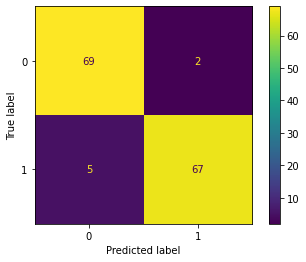

In [44]:
for model in lst1:
    print(model)
    #Model fitting
    model.fit(X_trainos,y_trainos)
    #Make Prediction on test set
    y_predos=model.predict(X_testos)
    #Performance Evaluation
    print('Accuracy Score by',model,':',accuracy_score(y_testos,y_predos))
    print(classification_report(y_testos,y_predos))
    print(ConfusionMatrixDisplay.from_predictions(y_testos,y_predos))
    print('*'*100)

**UNDERSAMPLING**

In [45]:
undersample=RandomUnderSampler(random_state=1)
X_us,y_us=undersample.fit_resample(X,y)

<AxesSubplot:xlabel='LUNG_CANCER', ylabel='count'>

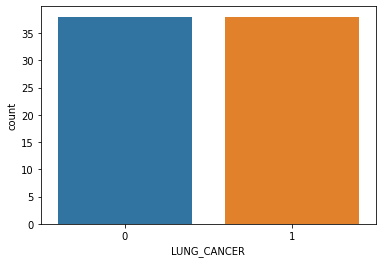

In [46]:
sns.countplot(y_us)

In [47]:
#Splitting dataset into training and test set 
X_trainus,X_testus,y_trainus,y_testus=train_test_split(X_us,y_us,test_size=0.3,random_state=1)

**Naive Bayes V/S K-Nearest Neighbor V/S Support Vector Machine**

GaussianNB()
Accuracy Score by GaussianNB() : 0.8695652173913043
              precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.92      0.86      0.89        14

    accuracy                           0.87        23
   macro avg       0.86      0.87      0.87        23
weighted avg       0.87      0.87      0.87        23

****************************************************************************************************
KNeighborsClassifier()
Accuracy Score by KNeighborsClassifier() : 0.782608695652174
              precision    recall  f1-score   support

           0       0.70      0.78      0.74         9
           1       0.85      0.79      0.81        14

    accuracy                           0.78        23
   macro avg       0.77      0.78      0.78        23
weighted avg       0.79      0.78      0.78        23

************************************************************************************************

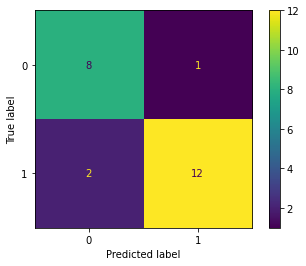

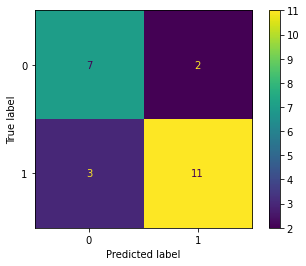

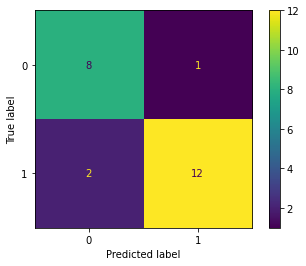

In [48]:
for model in lst1:
    print(model)
    #Model fitting
    model.fit(X_trainus,y_trainus)
    #Make Prediction on test set
    y_predus=model.predict(X_testus)
    #Performance Evaluation
    print('Accuracy Score by',model,':',accuracy_score(y_testus,y_predus))
    print(classification_report(y_testus,y_predus))
    print(ConfusionMatrixDisplay.from_predictions(y_testus,y_predus))
    print('*'*100)